In [1]:
#Importamos los paquetes a usar

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.optimize import linprog
from scipy.optimize import minimize

#Definimos las funciones a usar 

def pol(rx,ry,k,v,verts):
    "Sombrea parte de una gráfica. \n \n Argumentos:\n rx: límite izquierdo. \n ry: límite derecho. \n k: contador. \n"
    ax = plt.gca()
    if v==0:
        verts=[]
        for i in range(rx,ry):
            verts.append([i,f_1(i)])
        while k>=rx:
            verts.append([k,f_2(k)])
            k=k-1
    poly = Polygon(verts, facecolor='#8cff7a',alpha=0.6)
    ax.add_patch(poly)

def g(f,labely,labelx,label1,label2,color1,color2,title,rx1,ry1,k1,rx2,ry2,k2,v,verts):
    "Genera la gráfica de una función predeterminada. \n \n Argumentos:\n f: número de funciones.\n labely: título del Eje y.\n labelx: título del Eje x.\n label1: Leyenda de la primera función.\n label2: Leyenda de la segunda función.\n color1: color de la primera función.\n color2: color de la segunda función.\n title: Título del gráfico.\n rx1: primer argumento de la función pol para la primera función.\n ry1: segundo argumento de la función pol para la primera función.\n k1: tercer argumento de la función pol para la primera función.\n rx2: primer argumento de la función pol para la segunda función.\n ry2: segundo argumento de la función pol para la segunda función.\n k2: tercer argumento de la función pol para la segunda función.\n v: 0, si no se tienen los vértices, otro número en otro caso.\n verts: array, vértices."
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylabel(labely)
    ax.set_xlabel(labelx)
    ax.set_title(title)
    plt.grid(True)
    if f==1:
        plt.plot(x,F_1,color=color1,label=label1)
    else:
        plt.plot(x,F_1,color=color1,label=label1)
        plt.plot(x,F_2,color=color2,label=label2)
    ax.legend()
    pol(rx1,ry1,k1,v,verts)
    pol(rx2,ry2,k2,v,verts)
    plt.show()

def Dom(vec,F_1,F_2):
    "Encuentra las soluciones no dominadas de un problema multiobjetivo.\n \n Argumentos:\n vec: array, conjunto de posibles soluciones.\n F_1: valores evaluados de la primera función del problema multiobjetivo.\n F_2: valores evaluados de la segunda función del problema multiobjetivo. \n"
    Dominada=[]
    No_Dominada=[]
    for i in range(len(vec)):
        j=0
        d=0
        while (j<len(vec) and j!=i) and d==0:
            if vec[i] in Dominada:
                d=1
            else:
                if (F_1[i]<=F_1[j] and F_2[i]<F_2[j]) or (F_1[i]<F_1[j] and F_2[i]<=F_2[j]):
                    if vec[j] not in Dominada:
                        Dominada.append(vec[j])
                    if vec[j] in No_Dominada:
                        No_Dominada.remove(vec[j])
                    if vec[i] not in No_Dominada:
                        No_Dominada.append(vec[i])
                if (F_1[i]>=F_1[j] and F_2[i]>F_2[j]) or (F_1[i]>F_1[j] and F_2[i]>=F_2[j]):
                    if vec[i] not in Dominada:
                        Dominada.append(vec[i])
                    if vec[i] in No_Dominada:
                        No_Dominada.remove(vec[i])
                    if (vec[j] not in No_Dominada) and (vec[j] not in Dominada):
                        No_Dominada.append(vec[j])
                    d=1    
                if ((F_1[i]>=F_1[j] and F_2[i]<F_2[j]) or (F_1[i]>F_1[j] and F_2[i]<=F_2[j])) or ((F_1[i]<=F_1[j] and F_2[i]>F_2[j]) or (F_1[i]<F_1[j] and F_2[i]>=F_2[j])): 
                    if (vec[j] not in No_Dominada) and (vec[j] not in Dominada):
                        No_Dominada.append(vec[j])
                    if (vec[i] not in No_Dominada) and (vec[i] not in Dominada):
                        No_Dominada.append(vec[i])
            j=j+1
    print('Las soluciones de pareto son: \n')
    if np.array(No_Dominada).shape[1]==2:
        for i in No_Dominada:
            print('('+str(i[0])+','+str(i[1])+')')
    else:
        for i in No_Dominada:
            print('('+str(i[0])+','+str(i[1])+','+str(i[2])+')')

def plot(l1,l2,p,puntos):
    "Dibuja la región de objetivos de un problema multiobjetivo.\n \n Argumentos:\n l1: límite superior de x1.\n l2: límite superior de x2.\n p: 1 si se tienen puntos a ingresar, otro número en otro caso.\n puntos: array, valores a evaluar en Z."
    if p==0:
        x_1=np.arange(0,l1+1)
        x_2=np.arange(0,l2+1)
        Z=[]
        for i in x_1:
            for j in x_2:
                Z.append([i,j])
        Z_1=np.zeros(len(Z))
        Z_2=np.zeros(len(Z))
        for i in range(len(Z)):
            Z_1[i]=z_1(Z[i])
            Z_2[i]=z_2(Z[i])
    else:
        Z=puntos
        Z_1=np.zeros(len(Z))
        Z_2=np.zeros(len(Z))
        for i in range(len(Z)):
            Z_1[i]=z_1(Z[i])
            Z_2[i]=z_2(Z[i])
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylabel('$z_2$')
    ax.set_xlabel('$z_1$')
    ax.set_title('Región de objetivos')
    plt.grid(True)
    plt.scatter(Z_1,Z_2)
    plt.show()
            
def sol_lin(maxi,coef_obj,coef_res,coef_sol):
    "Solver de un problema de programación lineal para restricciones del tipo <=. \n \n Argumentos: \n maxi: 1 si es un problema de maximización, cualquier número en caso contrario. \n coef_obj: array, coeficientes de la función objetivo. \n coef_res: matriz, donde cada fila son los coeficientes de cada restricción. \n coef_sol: array, coeficientes del lado derecho de las restricciones. \n"
    if maxi==1:
        res=linprog(-1*np.array(coef_obj),A_ub=coef_res,b_ub=coef_sol)
        print('Z='+str(-1*res.fun))
        print('x1='+str(res.x[0]))
        print('x2='+str(res.x[1]))
    else:
        res=linprog(coef_obj,A_ub=coef_res,b_ub=coef_sol)
        print('Z='+str(res.fun))
        print('x1='+str(res.x[0]))
        print('x2='+str(res.x[1]))     

**1) Sea el problema de minimización**

$$f_1(x)=(x-50)^2, \quad f_2(x)=(x+50)^2, \quad -64\leq x\leq 64$$

**Hallar soluciones dominadas y no dominadas.**

Para hallar las soluciones dominadas y no dominadas usaremos un análisis de monotonía para las funciones. Como ambas derivadas son continuas en el intervalo dado, los únicos puntos críticos son $x=50$ para $f_1$ y $x=-50$ para $f_2$. Note que $f_1'(x)<0$ y $f_1'(x)>0$, para $x\in [-64,50)$ y $x\in (50,64]$, respectivamente. También, $f_2'(x)<0$ y $f_2'(x)>0$, para $x\in [-64,-50)$ y $x\in (-50,64]$, respectivamente. Por tanto, $f_1$ es creciente en el intervalo $(50,64]$ y decreciente en el intervalo $[-64,50)$, análogamente, $f_2$ es decreciente en el intervalo $[-64,-50)$ y creciente en el intervalo $(-50,64]$. La monotonía de cada función en el intervalo $-64\leq x\leq 64$ se muestra en la siguiente tabla:

| Intervalo |   $f_1(x)$   |   $f_2(x)$  |
|:---------:|:------------:|:-----------:|
| [-64,-50) | Decreciente  | Decreciente |
| (-50,50)  | Decreciente  |  Creciente  |
| (50,64]   |  Creciente   |  Creciente  |

Así, $x=50$ y $x=-50$ son mínimos relativos para $f_1$ y $f_2$, respectivamente. De hecho, son mínimos absolutos en el intervalo $-64\leq x\leq 64$ para cada función. Teniendo en cuenta este análisis previo de monotonía para ambas funciones, podemos establecer algunas conclusiones sobre las soluciones dominadas y no dominadas en este problema de minimización:
* Las soluciones dominadas se encuentran en el intervalo $[-64,-50)\cup (50,64]$, puesto que $x=-50$ domina al intervalo $[-64,-50)$ y $x=50$ domina al intervalo $(50,64]$
* Las soluciones no dominadas se encuentran en el intervalo $[-50,50]$ puesto que las soluciones en el intervalo $(-50,50)$ no son comparables en la relación de dominancia y $x=\pm50$ son los mínimos absolutos de cada función.

Lo anterior lo podemos notar en la siguiente gráfica:

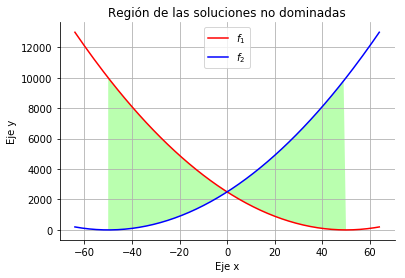

In [2]:
x=np.arange(-64,65)
def f_1(x):
    return (x-50)**2
def f_2(x):
    return (x+50)**2
F_1=f_1(x)
F_2=f_2(x)
g(2,'Eje y','Eje x','$f_1$','$f_2$','red','blue','Región de las soluciones no dominadas',-50,1,-1,0,51,49,0,0)

** 2) Encontrar las soluciones de pareto para el problema **

$$f_1(x_1,x_2)=1-e^{-(x_1-1)^2-(x_2+1)^2}$$
$$f_2(x_1,x_2)=1-e^{-(x_1+1)^2-(x_2-1)^2}$$

Antes de determinar las soluciones de pareto, veamos las trazas de $f_1$ y $f_2$ con los planos $x_1Z$ y $x_2Z$:

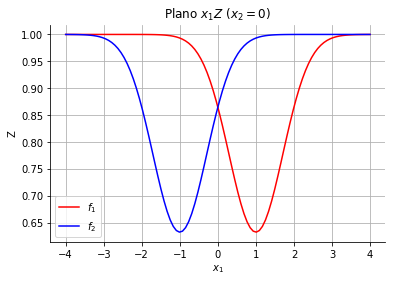

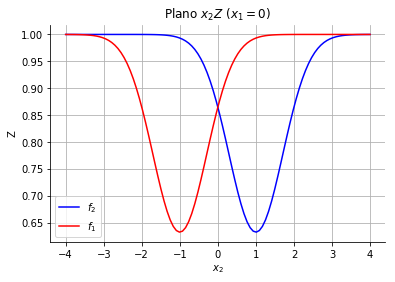

In [3]:
x=np.linspace(-4,4,100)
def f_1(x):
    return 1-np.exp(-(x-1)**2-1)
def f_2(x):
    return 1-np.exp(-(x+1)**2-1)
F_1=f_1(x)
F_2=f_2(x)
g(2,'Z','$x_1$','$f_1$','$f_2$','red','blue','Plano $x_1Z \ (x_2=0)$',0,0,0,0,0,0,0,0)
g(2,'Z','$x_2$','$f_2$','$f_1$','blue','red','Plano $x_2Z \ (x_1=0)$',0,0,0,0,0,0,0,0)

Siguiendo la misma idea del procedimiento usado en el ejercicio anterior, tiene sentido buscar las soluciones de pareto en la región $R$:

$$R: [\underset{x_1\in \mathbb{R}}{\text{arg}\min}f_2(x_1,0),\underset{x_1\in \mathbb{R}}{\text{arg}\min}f_1(x_1,0)]\times [\underset{x_1\in \mathbb{R}}{\text{arg}\min}f_2(x_1,0),\underset{x_1\in \mathbb{R}}{\text{arg}\min}f_1(x_1,0)]$$

Lo cual se hará con el siguiente algorimo:

In [4]:
def f_1(x):
    return 1-np.exp(-(x[0]-1)**2-(x[1]+1)**2)
def f_2(x):
    return 1-np.exp(-(x[0]+1)**2-(x[1]-1)**2)
vec=[]
for i in np.linspace(x[np.argmin(F_2)],x[np.argmin(F_1)],10):
    for j in np.linspace(x[np.argmin(F_2)],x[np.argmin(F_1)],10):
        vec.append([i,j])
F_1=[]
F_2=[]
for i in range(len(vec)):
    F_1.append(f_1(vec[i]))
    F_2.append(f_2(vec[i]))
Dom(vec,F_1,F_2)

Las soluciones de pareto son: 

(-1.01010101010101,0.7856341189674525)
(-1.01010101010101,1.0101010101010104)
(-0.7856341189674522,0.5611672278338946)
(-0.7856341189674522,0.7856341189674525)
(-0.5611672278338944,0.33670033670033694)
(-0.5611672278338944,0.5611672278338946)
(-0.5611672278338944,0.7856341189674525)
(-0.3367003367003365,0.11223344556677906)
(-0.3367003367003365,0.33670033670033694)
(-0.3367003367003365,0.5611672278338946)
(-0.11223344556677872,-0.11223344556677872)
(-0.11223344556677872,0.11223344556677906)
(0.11223344556677906,-0.3367003367003365)
(0.11223344556677906,-0.11223344556677872)
(0.11223344556677906,0.11223344556677906)
(0.33670033670033694,-0.5611672278338944)
(0.33670033670033694,-0.3367003367003365)
(0.5611672278338946,-0.7856341189674522)
(0.5611672278338946,-0.5611672278338944)
(0.5611672278338946,-0.3367003367003365)
(0.7856341189674525,-1.01010101010101)
(0.7856341189674525,-0.7856341189674522)
(0.7856341189674525,-0.5611672278338944)
(1.01010101010101

** 3) Una agencia de publicidad con 100 empleados; ha recibido un contrato para promover un producto nuevo. La agencia puede anunciarlo por radio y por TV. La tabla siguiente contiene datos sobre la cantidad de personas a las que llega cada tipo de anuncio y sus requisitos de costo y mano de obra.**

|                                  | Datos/min | anuncio |
| :------------------------------: | :-------: | :----:  |
|                                  | **Radio** |  **TV** |
| **Exposición (millones person)** |     4     |     8   |
| **Costo (millones de pesos)**    |     8     |    24   |
| **Empleados asignados**          |     1     |     2   |

**El contrato prohíbe a la agencia que use más de 6 minutos en anuncios por radio.**

**a) Dibujar la región de objetivos $(z_1,z_2)$.**

Sean $x_1, x_2$ los minutos asignados a los anuncios de radio y TV, respectivamente. La fórmulación de la situación anterior como un problema de programación lineal sería:

$$\begin{aligned}&\text{Max} \ z_1=4x_1+8x_2\\ &\text{Min} \ z_2=8x_1+24x_2\\ \\&\text{S.A.}\\ &x_1+2x_2\leq 100\\ &x_1\leq 6\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Observemos ahora como sería la región de objetivos para $z_1$ y $z_2$:

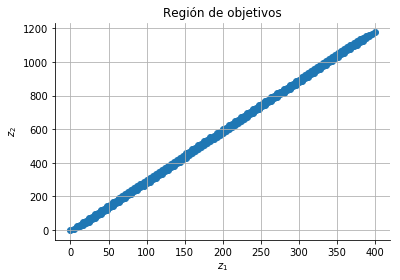

In [5]:
def z_1(Array):
    return 4*Array[0]+8*Array[1]
def z_2(Array):
    return 8*Array[0]+24*Array[1]
plot(6,47,0,0)

**b) Si la mayor importancia es la maximización de la exposición y se refleja a través del problema de ponderaciones $P(3,1)$, ¿cuántos minutos de anuncios por radio y TV debe programar la agencia con el propósito de maximizar las exposiciones y minimizar el costo de presupuesto?**

Considerando el método de las ponderaciones, el problema anterior se transforma en un problema mono-objetivo haciendo $Z=3z_1-z_2=12x_1+24x_2-8x_1-24x_2=4x_1$, así:

$$\begin{aligned}&\text{Max} \ Z=4x_1\\ \\&\text{S.A.}\\ &x_1+2x_2\leq 100\\ &x_1\leq 6\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Cuya solución trivial es $x_1=6$ y $x_2=0$ para un $Z=24$, es decir, $z_1=24$ y $z_2=48$. 

**c) Usar el método de $\epsilon$ restricciones para generar soluciones no dominadas.**

Considerando ahora el método de $\epsilon$ restricciones, el problema anterior se transforma en un problema mono-objetivo haciendo $z_2$ una restricción, así:

$$\begin{aligned}&\text{Max} \ z_1=4x_1+8x_2\\ \\&\text{S.A.}\\ &8x_1+24x_2\leq 100\\ &x_1+2x_2\leq 100\\ &x_1\leq 6\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvemos entonces el problema:

In [6]:
sol_lin(1,[4,8],[[8,24],[1,2],[1,0]],[100,100,6])

Z=41.333333333333336
x1=6.0
x2=2.166666666666667


Cuya solución es $x_1=6$, $x_2=2.17$ para un $z_1=41.34$ y $z_2=100$.

**4) Sea el problema de optimización:**

$$\begin{aligned} &\text{Max} \ z_1=3x_1+2x_2^2 \\ &\text{Min} \ z_2=-x_1+x_2^2 \\ \\ &\text{S.A.}\\ &2x_1+x_2\leq 24\\ &-x_1+2x_2\leq 16\\ &2x_1+4x_2\leq 48\\ &x_i\geq 0, \ i\in \{1,2\}\end{aligned}$$

Usemos el método de los pesos para resolver este problema multiobjetivo. Consideremos $Z=z_1-2z_2=3x_1+2x_2^2+2x_1-2x_2^2=5x_1$, así:

$$\begin{aligned} &\text{Max} \ Z=5x_1\\ \\ &\text{S.A.}\\ &2x_1+x_2\leq 24\\ &-x_1+2x_2\leq 16\\ &2x_1+4x_2\leq 48\\ &x_i\geq 0, \ i\in \{1,2\} \end{aligned}$$

Resolvemos entonces el problema:

In [7]:
sol_lin(1,[5,0],[[2,1],[-1,2],[2,4]],[24,16,48])

Z=60.0
x1=12.0
x2=0.0


Cuya solución es $x_1=12$, $x_2=0$ para un $Z=60$, es decir, $z_1=36$ y $z_2=-12$.

** 5) En el problema de cartera se tiene:** $E(R_1)=10\%$, $E(R_2)=15\%$, $Var(R_1)=0.0009$, $Var(R_2)=0.064$. **Resolver las siguientes cuestiones**:

**a) Dibujar la región factible.**

La fórmulación de la situación anterior como un problema de programación multiobjetivo sería:

$$\begin{aligned}&\text{Max} \ z_1=E(R(x))=0.1x_1+0.15x_2\\ &\text{Min} \ z_2=Var(R(x))=0.0009x_1^2+0.064x_2^2\\ \\&\text{S.A.}\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Observemos ahora como sería la región factible:

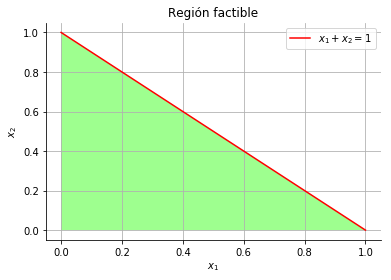

In [8]:
x=np.linspace(0,1,100)
F_1=1-x
verts=[[0,0],[0,1],[1,0],[0,0]]
g(1,'$x_2$','$x_1$','$x_1+x_2=1$',' ','red',' ','Región factible',0,2,0,0,0,0,1,verts)

**b) Aproximar la región objetivo** $z_1,z_2$. **Tome los siguientes puntos:**

| **Puntos** | $(x_1,x_2)$ |
| ---------- | ----------- |
|      0     |    (0,0)    |
|      A     |   (0.5,0)   |
|      B     |    (1,0)    |
|      C     |  (0.5,0.5)  |
|      D     |    (0,1)    |
|      E     |   (0,0.5)   |

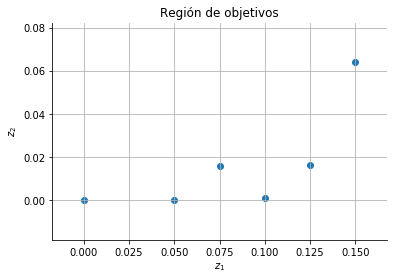

In [9]:
def z_1(array):
    return 0.1*array[0]+0.15*array[1]
def z_2(array):
    return 0.0009*(array[0]**2)+0.064*(array[1]**2)
puntos=np.array([[0,0],[0.5,0],[1,0],[0.5,0.5],[0,1],[0,0.5]])
plot(1,1,1,puntos)

**c) Suponga que el objetivo** $z_1$ **es doblemente importante que el objetivo $z_2$.**

Bajo la suposición anterior se tiene que $Z=2z_1-z_2=0.2x_1+0.3x_2-0.0009x_1^2-0.064x_2^2$, así

$$\begin{aligned}&\text{Max} \ Z=0.2x_1+0.3x_2-0.0009x_1^2-0.064x_2^2\\&\text{S.A.}\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvamos entonces el problema:

In [10]:
def objective(x):
    return -0.2*x[0]-0.3*x[1]+0.0009*(x[0]**2)+0.064*(x[1]**2)
def constraint1(x):
    return -x[0]-x[1]+1
x0=np.array([0,1])
b = (0,1)
bnds = (b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
cons = ([con1])
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
x=solution.x
print('x1=' + str(x[0]))
print('x2=' + str(x[1]))
print('Z='+str(-1*objective(x)))

x1=0.21571645113983837
x2=0.7842835488601616
Z=0.23902003081664092


Cuya solución es $x_1=0.216$ y $x_2=0.784$ para un $Z=0.239$, es decir, $z_1=0.139$ y $z_2=0.1$.

**d) Si ahora se considera más importante el objetivo $z_1$ y se toma como meta para el segundo objetivo el valor** $\epsilon_2=0.05$.

Considerando ahora el método de $\epsilon$-restricciones, tenemos:

$$\begin{aligned}&\text{Max} \ z_1=0.1x_1+0.15x_2\\ &\text{S.A.}\\ &0.0009x_1^2+0.064x_2^2\geq 0.05\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvamos entonces el problema:

In [11]:
def objective(x):
    return -0.1*x[0]-0.15*x[1]
def constraint1(x):
    return 0.0009*(x[0]**2)+0.064*(x[1]**2)-0.05
def constraint2(x):
    return -x[0]-x[1]+1
x0=np.array([0.5,0.5])
b = (0,1)
bnds = (b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'ineq', 'fun': constraint2} 
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
x=solution.x
print('x1=' + str(x[0]))
print('x2=' + str(x[1]))
print('Z='+str(-1*objective(x)))

x1=2.270406085358445e-13
x2=1.0
Z=0.1500000000000227


Cuya solución es $x_1=0$ y $x_2=1$, para $z_1=0.15$ y $z_2=0.064$.

**e) Asuma que** $\rho_{12}=0.73$**, coeficiente de correlación entre el rendimiento 1 y el rendimiento 2. Responder el inciso anterior.**

Considerando ahora el método de $\epsilon$-restricciones, tenemos:

$$\begin{aligned}&\text{Max} \ z_1=0.1x_1+0.15x_2\\ &\text{S.A.}\\ &0.0009x_1^2+0.73x_1x_2+0.73x_2x_1+0.064x_2^2\geq 0.05\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvamos entonces el problema:

In [12]:
def objective(x):
    return -0.1*x[0]-0.15*x[1]
def constraint1(x):
    return 0.0009*(x[0]**2)+1.46*x[1]*x[0]+0.064*(x[1]**2)-0.05
def constraint2(x):
    return -x[0]-x[1]+1
x0=np.array([0.5,0.5])
b = (0,1)
bnds = (b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'ineq', 'fun': constraint2} 
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
x=solution.x
print('x1=' + str(x[0]))
print('x2=' + str(x[1]))

x1=0.0
x2=1.0


Cuya solución es $x_1=0$ y $x_2=1$, para $z_1=0.15$ y $z_2=0.064$.

**6) El problema siguiente es propuesto por Zitzler: considere** $f(x)=(f_1(x),f_2(x)), \ x\in \mathbb{R}^n$**, donde** $f_1(x)=x_1$**,** $f_2(x)=g(x)h(f_1(x),g(x))$ y $\displaystyle g(x)=1+\frac{1}{n-1}\sum_{i=2}^nx_i$**,** $\displaystyle h(f_1(x),g(x))=1-\sqrt{\frac{f_1(x)}{g(x)}}$**. Asuma que** $n=3$ **y** $x_i=[0,1]$**. Encontrar las soluciones de Pareto.**

In [13]:
def f(Array):
    g=1+(np.sum(Array[1:3])/2)
    h=1-np.sqrt(Array[0]/g)
    f_2=g*h
    return Array[0],f_2
x_1=np.linspace(0,1,10)
x_2=np.linspace(0,1,10)
x_3=np.linspace(0,1,10)
vec=[]
for i in x_1:
    for j in x_2:
        for k in x_3:
            vec.append([i,j,k])
F_1=[]
F_2=[]
for i in vec:
    F_1.append(f(i)[0])
    F_2.append(f(i)[1])
Dom(vec,F_1,F_2)

Las soluciones de pareto son: 

(0.0,0.0,0.0)
(0.1111111111111111,0.0,0.0)
(0.2222222222222222,0.0,0.0)
(0.3333333333333333,0.0,0.0)
(0.4444444444444444,0.0,0.0)
(0.5555555555555556,0.0,0.0)
(0.6666666666666666,0.0,0.0)
(0.7777777777777777,0.0,0.0)
(0.8888888888888888,0.0,0.0)
(1.0,0.0,0.0)


**7) Presentar un breve informe sobre el AHP Fuzzy.**

[El informe puede verse aquí](https://github.com/j-luisrd/Programaci-n/blob/master/PM/FAHP.pdf).